## John Gomes
# ME5311-CFD: Your 2nd CFD problem


### 1D transient conduction in a semi-infinite wall

Transient conduction in a semi-infinite wall is a common problem that can be encountered in engineering, for example, when heat transfer along a large thin wall with small thermal conductivity is of interest. The governing equation is a parabolic partial differential equation, 

$$ \rho c \frac{\partial T}{\partial t} = \frac{\partial}{\partial x}(k\frac{\partial T}{\partial x}) $$

with boundary conditions,

$$ T(x,0) = T_i, x > 0 $$
$$ T(0,t) = T_s, t > 0 $$
$$ T(x \to \infty, t) = T_i,  t > 0$$

The numerical solution of this problem exercises spatial and temporal discretization. In particular, this is a good example to understand accuracy versus stability of a numerical method. A first-order explicit method is used to advance the solution in time, while a second-order central difference is used to discretize the spatial derivative term. The initial time step $dt$ is chosen to be right at the stability limit. Readers can increase dt to be larger than the default value to observe numerical instability.  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
%matplotlib inline

In [3]:
# Physical and numerical parameters
alpha = 1e-5       # thermal diffusivity [m^2/s]
L = 0.3            # wall depth [m]
N = 150             # number of cells (a finite volume method)
dx = L / N          # cell size for the numerical solution 
dt = 0.5*dx**2/alpha # time step chosen. Note that 0.5 * dx**2 / alpha is the upper limit for obtaining stable solution
Nt = 5000 # number of total time steps
T_i = 300 # initial temperature of the whole domain 
T_s = 400 # boundary temperature at x = 0, at t > 0 

## Note:
I have modified this section to be a function in order to avoid repetition

In [4]:
def solve_prob(N=150, Nt=5000, alpha=1e-5, L=0.3, T_i=300, T_s=400, dt=0.5*(0.3/150)**2/1e-5):
    # Spatial grid (cell centers)
    dx = L / N   
    x = np.linspace(dx/2, L - dx/2, N)
    
    # Initial condition
    T = np.ones(N) * T_i
    # Boundary condition
    T[0] = T_s
    
    # Time snapshots and storage
    snapshots = [100, 500, 1000, 5000]
    T_record = {} # empty array to host the numerical solution for T
    T_analytical = {} # empty array to host the analytical solution at the same location as the numerical solution
    
    # explicit time stepping
    for n in range(1, Nt + 1):
        T_old = T.copy() # store a copy of the existing solution obtained from the previous time step
        for i in range(1, N - 1):
            T[i] = T_old[i] + alpha * dt / dx**2 * (T_old[i+1] - 2*T_old[i] + T_old[i-1]) # Eq. 3.63 in the book 
        T[0] =  T_old[0] + alpha * dt / dx**2 * (T_old[1] - 3*T_old[0] + 2*T_s) # taking care of the boundary condition at x = 0
        T[N-1]= T_old[N-1] + alpha * dt / dx**2 * (T_old[N-2] - 3*T_old[N-1] + 2*T_i) #taking care of the boundary condition at x = L
        
        if n in snapshots:
            T_record[n] = T.copy() # store the latest solution to the array, adding it to the last column
            t_now = n * dt
            T_analytical[n] = T_s + (T_i - T_s) * erf(x / (2 * np.sqrt(alpha * t_now))) # computing and store analytical solution at the same time step
    
    # Plotting with time annotations
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(10, 8))
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    for idx, n in enumerate(snapshots):
        t_now = n * dt
        label_text = f't = {t_now:.1f} s'
        
        # Plot numerical and analytical
        plt.plot(x, T_record[n], '-+', color=colors[idx], label=f'FVM {label_text}')
        plt.plot(x, T_analytical[n], '-', color=colors[idx], label=f'Analytical {label_text}')
        
        # Annotate time on the FVM curve
        i_annot = int(len(x) * 0.2)  # location to annotate
        plt.annotate(label_text,
                     xy=(x[i_annot], T_record[n][i_annot]),
                     xytext=(x[i_annot] + 0.005, T_record[n][i_annot] + 3),
                     fontsize=18,
                     arrowprops=dict(arrowstyle='->', color=colors[idx]))
    
    plt.xlabel('Depth [m]', fontsize=18)
    plt.ylabel('Temperature [K]', fontsize=18)
    #plt.title('1D Transient Heat Conduction into Semi-Infinite Wall\n(FVM vs Analytical)', fontsize=15)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # Plotting with time annotations
    # Plot the solution in the similarity coordinate eta = x / sqrt(alpha * t)
    
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(10, 8))
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    for idx, n in enumerate(snapshots):
        t_now = n * dt
        label_text = f't = {t_now:.1f} s'
        
        theta = (T_record[n] - T_s)/(T_i - T_s)
        eta = x/2/np.sqrt(alpha*t_now)
        # Plot numerical and analytical
        plt.plot(eta, theta, '--', color=colors[idx], label=f'FVM {label_text}')
        
        # Annotate time on the FVM curve
        i_annot = int(len(x) * 0.2)  # location to annotate
        plt.annotate(label_text,
                     xy=(x[i_annot], T_record[n][i_annot]),
                     xytext=(x[i_annot] + 0.005, T_record[n][i_annot] + 3),
                     fontsize=18,
                     arrowprops=dict(arrowstyle='->', color=colors[idx]))
    
    plt.xlabel('$\eta$', fontsize=18)
    plt.ylabel('$\Theta$', fontsize=18)
    #plt.title('1D Transient Heat Conduction into Semi-Infinite Wall\n(FVM vs Analytical)', fontsize=15)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    return x, T_record, T_analytical

<>:81: SyntaxWarning: invalid escape sequence '\e'
<>:82: SyntaxWarning: invalid escape sequence '\T'
<>:81: SyntaxWarning: invalid escape sequence '\e'
<>:82: SyntaxWarning: invalid escape sequence '\T'
C:\Users\gomes\AppData\Local\Temp\ipykernel_10868\3308402983.py:81: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('$\eta$', fontsize=18)
C:\Users\gomes\AppData\Local\Temp\ipykernel_10868\3308402983.py:82: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel('$\Theta$', fontsize=18)


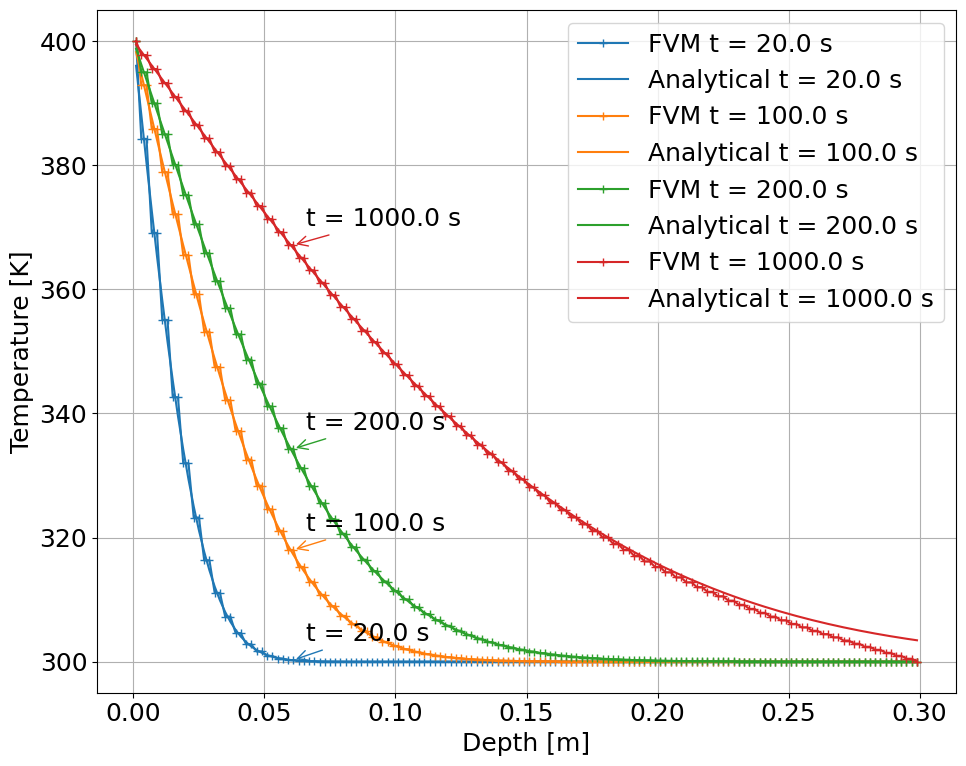

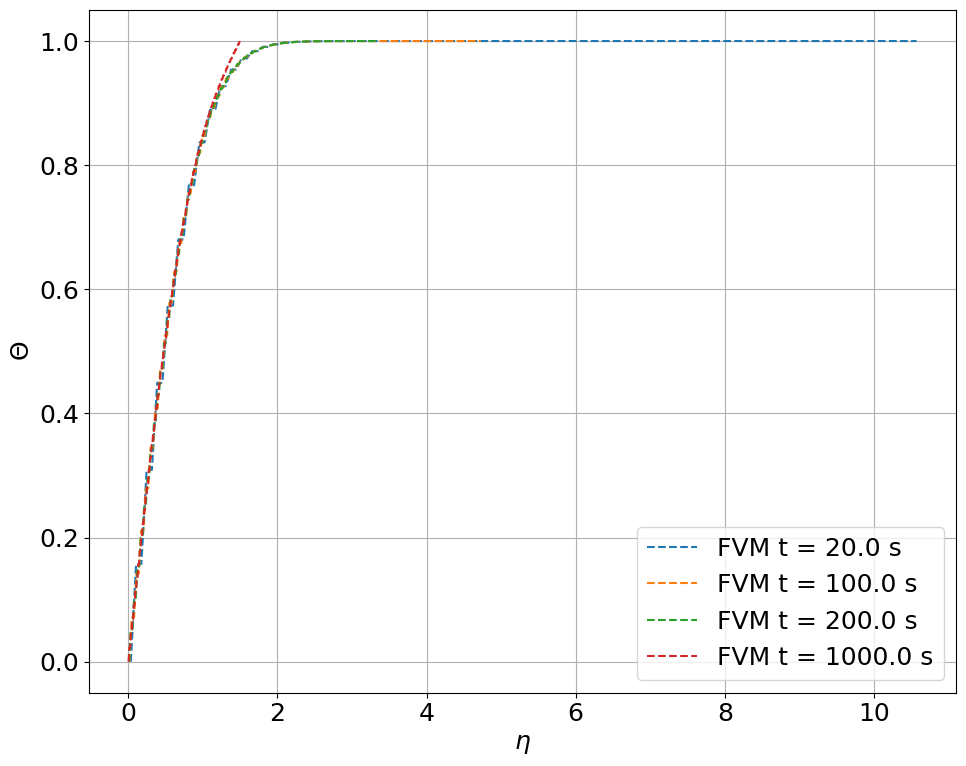

In [5]:
x, T_num, T_analytical = solve_prob(N=150, Nt=5000, alpha=1e-5, L=0.3, T_i=300, T_s=400, dt=0.5*(0.3/150)**2/1e-5)

### Comments 

The above figure shows the temperature evolution at 20, 100, 200 and 1000~s, compared to the analytical solutions, using $\Delta t = 0.1$~s. Great agreement is achieved between the numerical and analytical solutions, verifying that the numerical procedure is correct. It is noteworthy that the temperature beyond 0.2~m is unaffected by the sudden increase of temperature (or appears to have no knowledge of the change) on the left boundary by 200 seconds. This is because diffusion occurs at finite rates, and at 200~seconds with a diffusivity of $10^{-5}$, the length scale for diffusion can be estimated using $2\sqrt{\alpha t}$ as indicated by the similarity variable, which gives a value of 0.04~m. This estimated distance is on the same order of magnitude with the observation from the results here. Further advancement in time makes the temperature significantly different from the initial temperature at the right boundary when using $L=0.3$. In other words, $L=0.3$~m violates the assumptions of semi-infinite domain in the analytical solution. As a result, a deviation between the numerical solution is observed from the analytical solution at $t=1000$~s. 


We use this Jupyter notebook to explore the idea of self-similarity.
The second figure shows the same solutions after normalization, using the variables $\theta$ and $\eta$. All the results at different physical time instants collapse with one another, which is the meaning or signature of a ``self-similar solution''. The solution at $t = 1000$~s slightly deviates from the rest of the profiles, since it violates the semi-infinite domain assumption, as discussed above. 

### Exercise 1 

Change the time step to be twice the current value and observe the temperature profiles. Comment on the results. 

C:\Users\gomes\AppData\Local\Temp\ipykernel_10868\3308402983.py:20: RuntimeWarning: overflow encountered in scalar multiply
  T[i] = T_old[i] + alpha * dt / dx**2 * (T_old[i+1] - 2*T_old[i] + T_old[i-1]) # Eq. 3.63 in the book
C:\Users\gomes\AppData\Local\Temp\ipykernel_10868\3308402983.py:20: RuntimeWarning: overflow encountered in scalar subtract
  T[i] = T_old[i] + alpha * dt / dx**2 * (T_old[i+1] - 2*T_old[i] + T_old[i-1]) # Eq. 3.63 in the book
C:\Users\gomes\AppData\Local\Temp\ipykernel_10868\3308402983.py:20: RuntimeWarning: overflow encountered in scalar add
  T[i] = T_old[i] + alpha * dt / dx**2 * (T_old[i+1] - 2*T_old[i] + T_old[i-1]) # Eq. 3.63 in the book
C:\Users\gomes\AppData\Local\Temp\ipykernel_10868\3308402983.py:21: RuntimeWarning: overflow encountered in scalar multiply
  T[0] =  T_old[0] + alpha * dt / dx**2 * (T_old[1] - 3*T_old[0] + 2*T_s) # taking care of the boundary condition at x = 0
C:\Users\gomes\AppData\Local\Temp\ipykernel_10868\3308402983.py:20: RuntimeWa

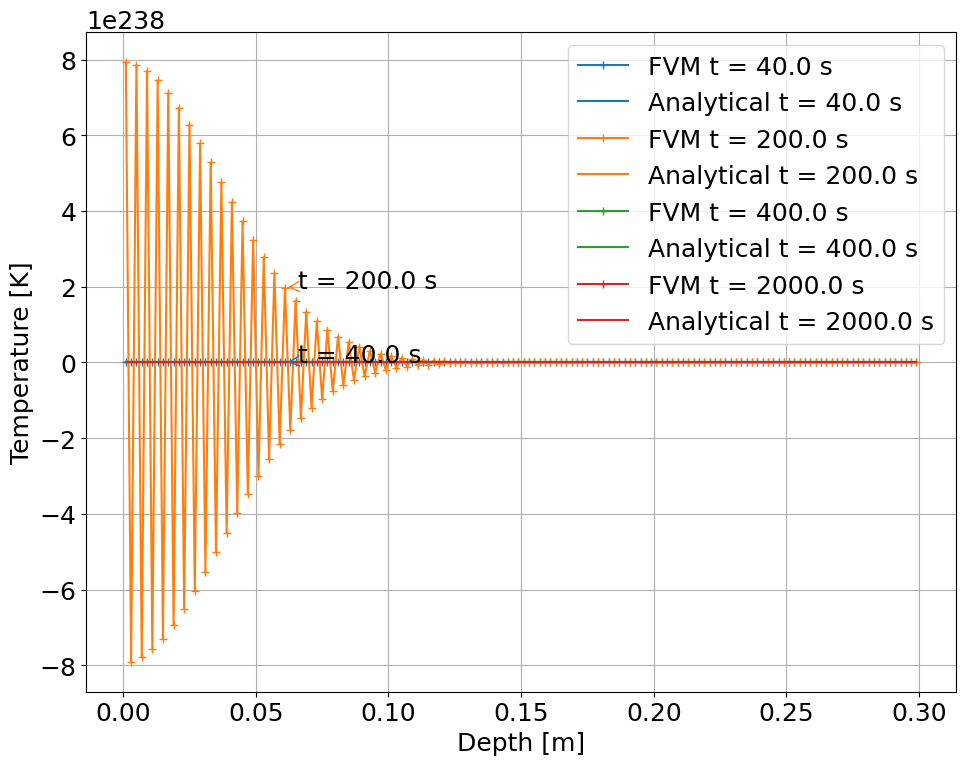

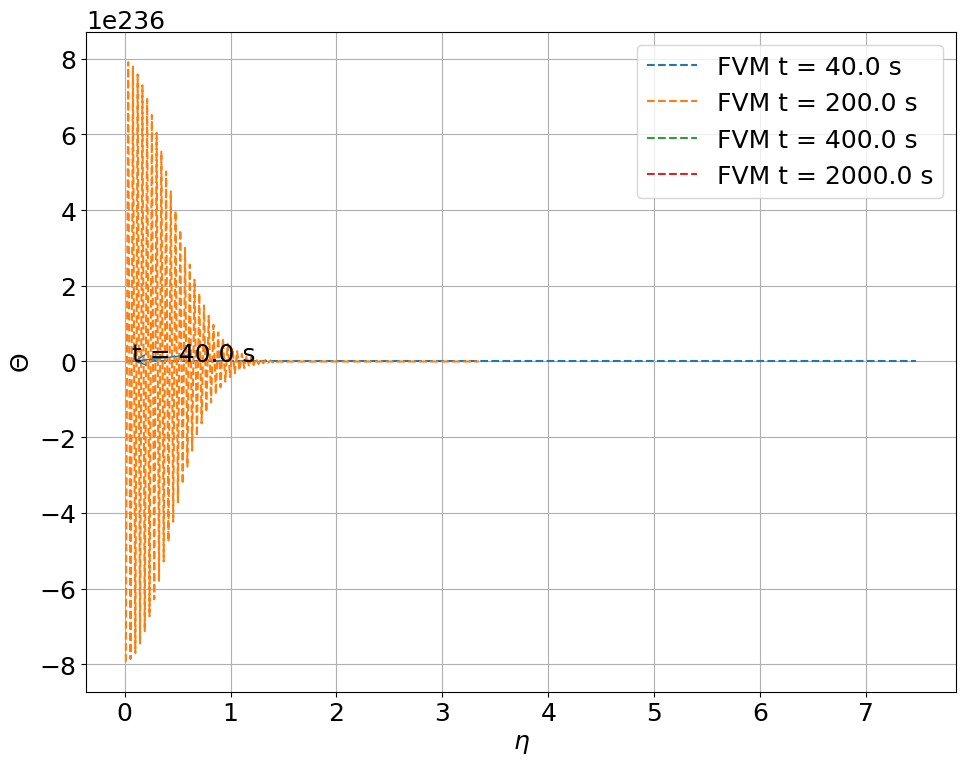

In [6]:
x, T_num, T_analytical = solve_prob(N=150, Nt=5000, alpha=1e-5, L=0.3, T_i=300, T_s=400, dt=(0.3/150)**2/1e-5)

# Discussion
From this, we can see that the solution is no longer stable. As suggested by the comment in the code provided, 0.5*dx^2/alpha is the upper limit for stability.

As we cross this threshold, the solution now oscillates, essentially to infinity. This is shown in equation 3.40 of the reading. This equation calculates the explicit temperature for the next time step using the current time step. Here, when dt > 0.5*dx^2/alpha, temperatures will grow to inf, -inf- an obvious numerical error.

### Excercise 2 

Discretize the governing equation using a first-order implicit time-stepping scheme and program an implicit solver for the same problem. Once the program is ready, solve the problem using two time steps dt = 0.5*dx^2 / alpha and dt = dx^2 / alpha. Compare to results from the explicit time-stepping scheme in terms of accuracy and stability. 

In [7]:
def solve_prob_implicit(N=150, Nt=5000, alpha=1e-5, L=0.3, T_i=300, T_s=400, dt=0.5*(0.3/150)**2/1e-5):
    # Spatial grid (cell centers)
    dx = L / N   
    x = np.linspace(dx/2, L - dx/2, N)
    
    # Mesh Fourier Number
    r = alpha * dt / dx**2
    
    # Initial condition
    T = np.ones(N) * T_i
    
    # Time snapshots and storage
    snapshots = [100, 500, 1000, 5000]
    T_record = {} 
    T_analytical = {} 
    
    a = -r * np.ones(N)      # Lower diagonal
    b = (1 + 2*r) * np.ones(N) # Main diagonal
    c = -r * np.ones(N)      # Upper diagonal


    b[0] = 1 + 3*r
    c[0] = -r
    
    b[-1] = 1 + 3*r
    a[-1] = -r

    # Implicit time stepping
    for n in range(1, Nt + 1):
        d = T.copy() 
        d[0] += 2*r*T_s  
        d[-1] += 2*r*T_i 
        
        cp = np.zeros(N)
        dp = np.zeros(N)
        
        cp[0] = c[0] / b[0]
        dp[0] = d[0] / b[0]
        for i in range(1, N):
            denom = b[i] - a[i] * cp[i-1]
            cp[i] = c[i] / denom
            dp[i] = (d[i] - a[i] * dp[i-1]) / denom
            
        T_new = np.zeros(N)
        T_new[-1] = dp[-1]
        for i in range(N-2, -1, -1):
            T_new[i] = dp[i] - cp[i] * T_new[i+1]
            
        T = T_new 
        
        if n in snapshots:
            T_record[n] = T.copy() 
            t_now = n * dt
            T_analytical[n] = T_s + (T_i - T_s) * erf(x / (2 * np.sqrt(alpha * t_now))) 
    
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(10, 8))
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    for idx, n in enumerate(snapshots):
        t_now = n * dt
        label_text = f't = {t_now:.1f} s'
        plt.plot(x, T_record[n], '-+', color=colors[idx], label=f'FVM {label_text}')
        plt.plot(x, T_analytical[n], '-', color=colors[idx], label=f'Analytical {label_text}')
        i_annot = int(len(x) * 0.2)
        plt.annotate(label_text, xy=(x[i_annot], T_record[n][i_annot]),
                     xytext=(x[i_annot] + 0.005, T_record[n][i_annot] + 3),
                     fontsize=18, arrowprops=dict(arrowstyle='->', color=colors[idx]))
    
    plt.xlabel('Depth [m]', fontsize=18); plt.ylabel('Temperature [K]', fontsize=18)
    plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

    plt.figure(figsize=(10, 8))
    for idx, n in enumerate(snapshots):
        t_now = n * dt
        theta = (T_record[n] - T_s)/(T_i - T_s)
        eta = x/2/np.sqrt(alpha*t_now)
        plt.plot(eta, theta, '--', color=colors[idx], label=f'FVM t={t_now:.1f}s')
    
    plt.xlabel('$eta$', fontsize=18); plt.ylabel('$Theta$', fontsize=18)
    plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()
    
    return x, T_record, T_analytical

$$ dt=\frac{0.5*dx^2}{\alpha} $$

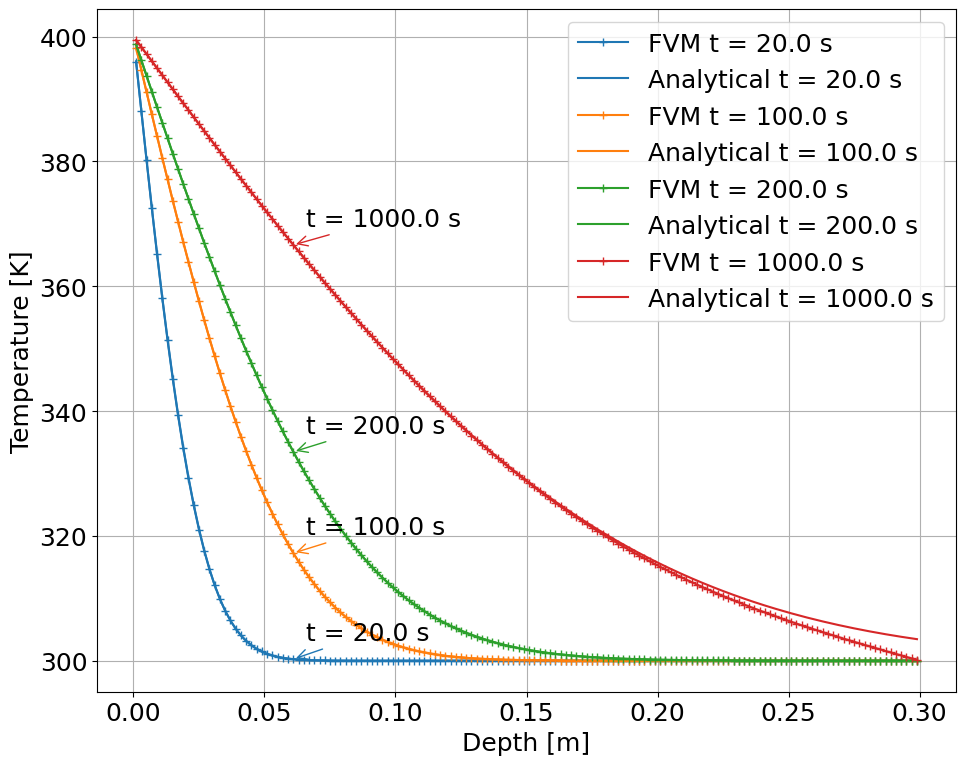

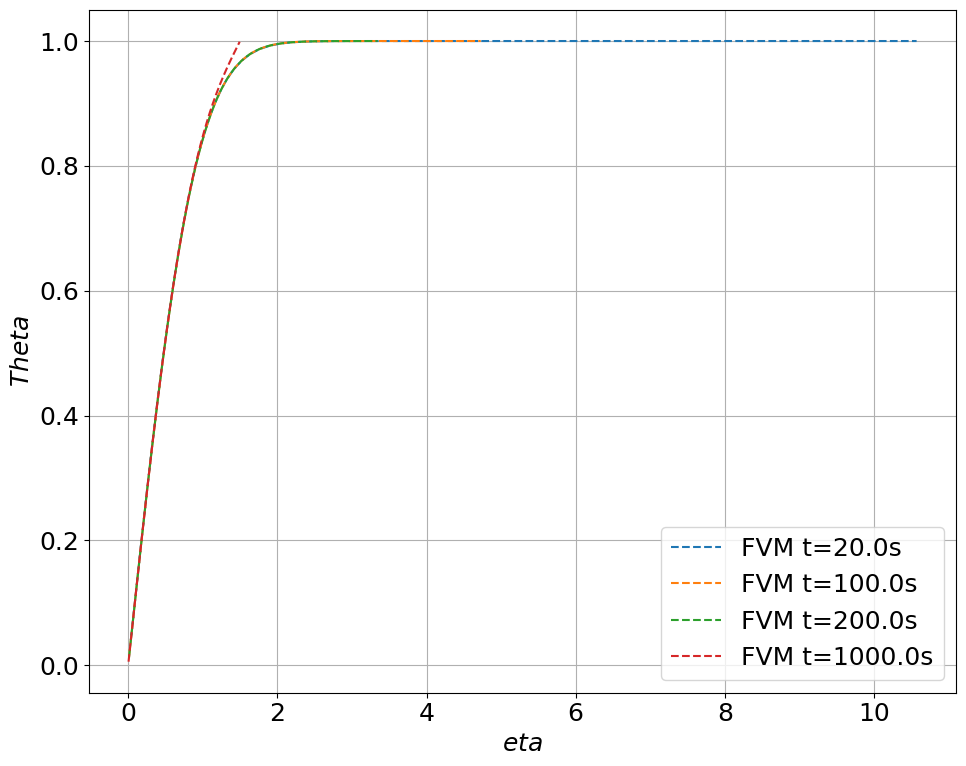

In [8]:
dt1 = 0.5*dx**2/alpha;
solve_prob_implicit(N=150, Nt=5000, alpha=1e-5, L=0.3, T_i=300, T_s=400,dt=dt1);

$$ dt=\frac{dx^2}{\alpha} $$

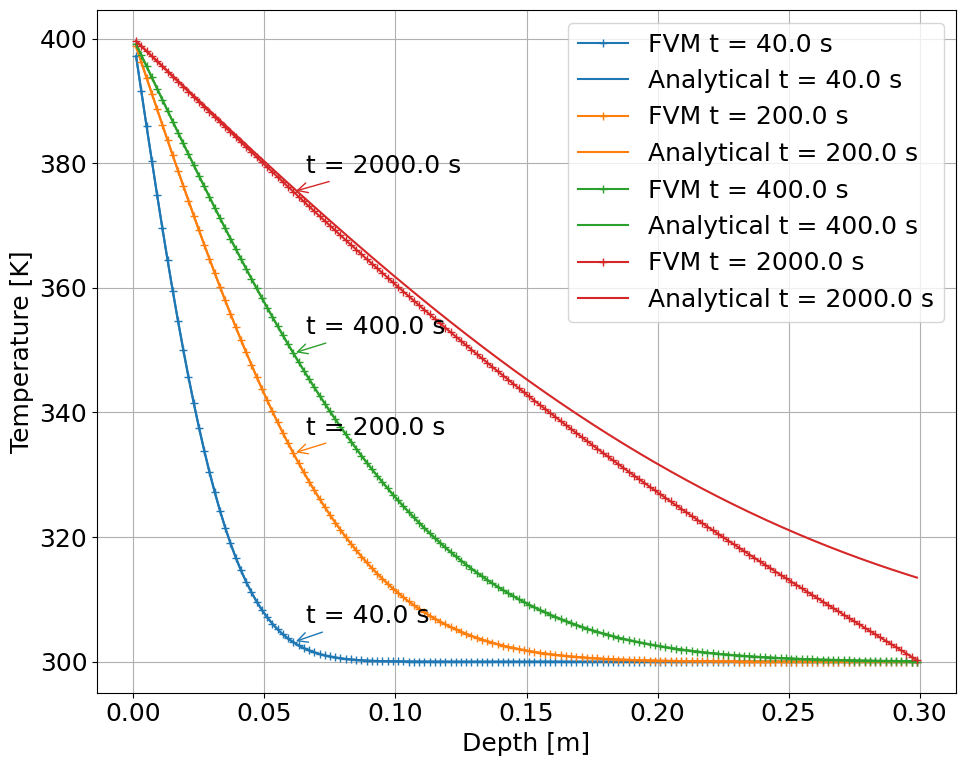

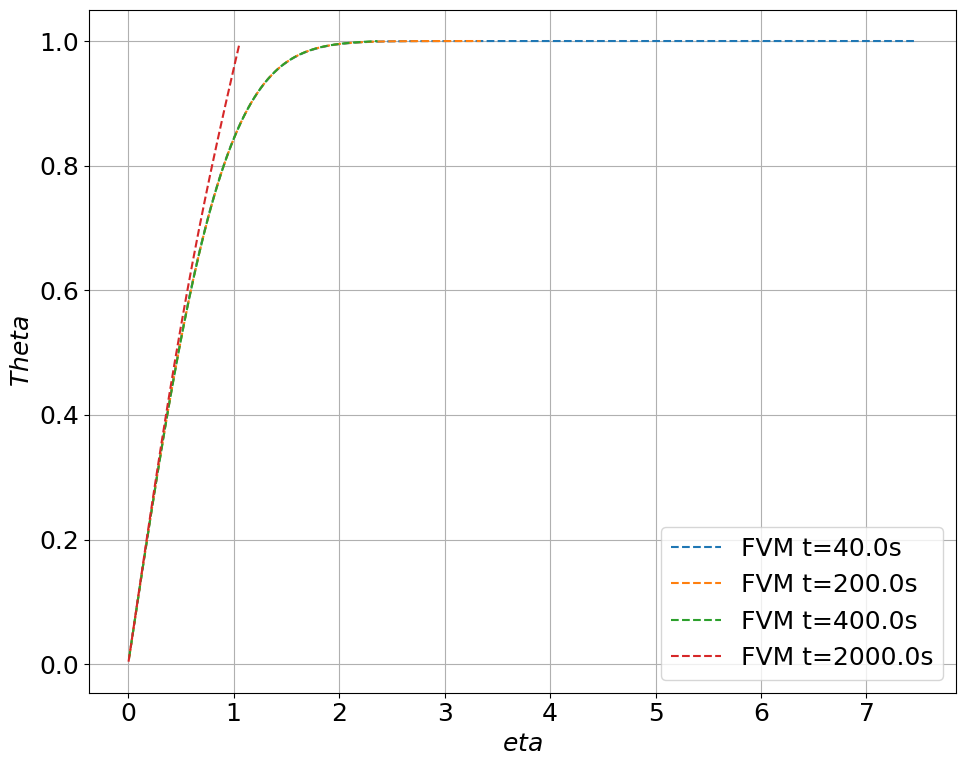

In [9]:
dt2 = dx**2 / alpha;
solve_prob_implicit(N=150, Nt=5000, alpha=1e-5, L=0.3, T_i=300, T_s=400,dt=dt2);

# Discussion

The results for $dt = 0.5 * dx^2 / \alpha $ look almost indentical between the implicit and explicit solutions. There is a slight difference, showing the explicit solver matches the analytical slightly better.

However, the results for  $dt = dx^2 / \alpha $ are not similar. It is apparent that the implicit solution does not run into the same stability issue seen with the explicit solver. 


While it is convenient that the implicit solver does not explode for larger dt values, it is not necessarily useful in this case. Just because the problem did not explode to infinity does not mean it is a 'correct' solution. Even just doubling dt shows a large change in the temperature profiles. This is especially obvious in the t = 1000 s run (red line). This makes sense- for more timesteps, more error accumulates. The analytical and FVM solutions begin to spread away from each other as time goes on. 

This is the most important takeaway, we as CFD engineers need to know the difference between a model that runs and a model that is credible.